<a href="https://colab.research.google.com/github/Jay21-bot/chessboard_analyser/blob/main/Chessboard_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 AI Chessboard Analysis Project
This notebook analyzes a chessboard image and counts the number of black and white squares using computer vision.


In [24]:
# Step 1: Install and import libraries
!pip install opencv-python-headless
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [25]:
# Step 2: Upload images
from google.colab import files
uploaded = files.upload()


Saving OIP.jpg to OIP (1).jpg
Saving red-white-checkered-tile-with-red-white-pattern_1325814-8900.jpg to red-white-checkered-tile-with-red-white-pattern_1325814-8900 (4).jpg


In [26]:
# Step 4: Create a class for image recognition

class ChessboardAnalyzer:
    def __init__(self, image_path):
        # Step 1: Initialize with the image path and load the image
        self.image_path = image_path
        self.image = cv2.imread(image_path)  # Read the image from the path
        self.gray = None
        self.blurred = None
        self.thresh = None
        self.black_count = 0
        self.white_count = 0

    # Step 2: Preprocessing the image (Convert to grayscale, apply blur, and threshold)
    def preprocess_image(self):
        # Step 2a: Convert to grayscale
        self.gray = cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)  # Grayscale conversion for easier processing

        # Step 2b: Apply Gaussian blur to reduce noise
        self.blurred = cv2.GaussianBlur(self.gray, (5, 5), 0)  # Gaussian blur to smooth the image and reduce noise

        # Step 2c: Apply binary thresholding (Otsu's method auto-detects threshold)
        _, self.thresh = cv2.threshold(self.blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)  # Thresholding for binary image

    # Step 3: Detect squares and classify as black or white
    def detect_squares(self):
        # Step 3a: Find contours in the thresholded image
        contours, _ = cv2.findContours(self.thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)  # Contour detection

        self.black_count = 0  # Reset black square count
        self.white_count = 0  # Reset white square count

        # Step 3b: Loop through each contour and detect squares
        for cnt in contours:
            # Approximate contour to a polygon
            approx = cv2.approxPolyDP(cnt, 0.02 * cv2.arcLength(cnt, True), True)

            # Step 3c: Check if the contour is a square (4 vertices)
            if len(approx) == 4 and cv2.contourArea(cnt) > 1000:  # Check if it's a square and area is large enough
                x, y, w, h = cv2.boundingRect(cnt)  # Get bounding box of the square
                square = self.image[y:y+h, x:x+w]  # Crop the square region from the image

                # Step 3d: Calculate the average pixel value (mean) to classify the square as black or white
                mean_val = np.mean(cv2.cvtColor(square, cv2.COLOR_BGR2GRAY))  # Convert to grayscale and get the mean value

                # Step 3e: Classify the square based on its brightness (black if mean value < 128, else white)
                if mean_val < 128:  # Dark square = Black
                    self.black_count += 1  # Increment black square count
                    color = (0, 0, 255)  # Red color for black square (for visualization)
                else:  # Light square = White
                    self.white_count += 1  # Increment white square count
                    color = (0, 255, 0)  # Green color for white square (for visualization)

                # Step 3f: Draw a rectangle around the detected square
                cv2.rectangle(self.image, (x, y), (x + w, y + h), color, 2)  # Draw rectangle around the square

    # Step 4: Annotate and show the results
    def show_results(self):
        # Step 4a: Annotate the image with the count of black and white squares
        cv2.putText(self.image, f'Black: {self.black_count} | White: {self.white_count}', (20, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)  # Add the text on the image

        # Step 4b: Display the annotated image
        cv2_imshow(self.image)  # Show the image with annotated results




Because of improper image or lack of availibity on the web I need to stick with this image .

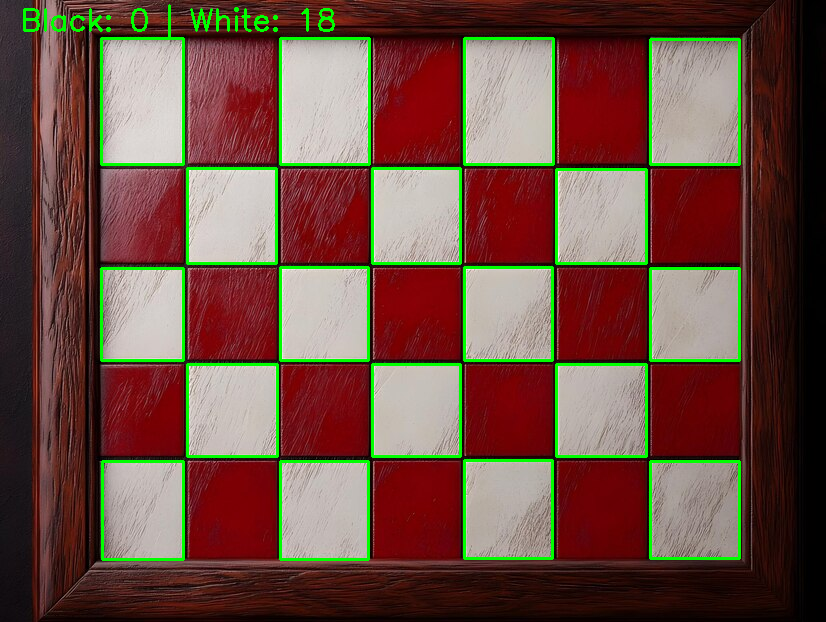

In [27]:
        # Example usage for image1
# Step 5: Create an instance for Image 1
image1_analyzer = ChessboardAnalyzer('red-white-checkered-tile-with-red-white-pattern_1325814-8900.jpg')  # Replace with your actual image name
image1_analyzer.preprocess_image()  # Step 6: Preprocess the image
image1_analyzer.detect_squares()   # Step 7: Detect squares and classify as black or white
image1_analyzer.show_results()     # Step 8: Show the results for Image 1
